In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [25]:
def black_scholes_price(S, K, T, r, sigma, option_type="call"):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == "call":
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Invalid option type")

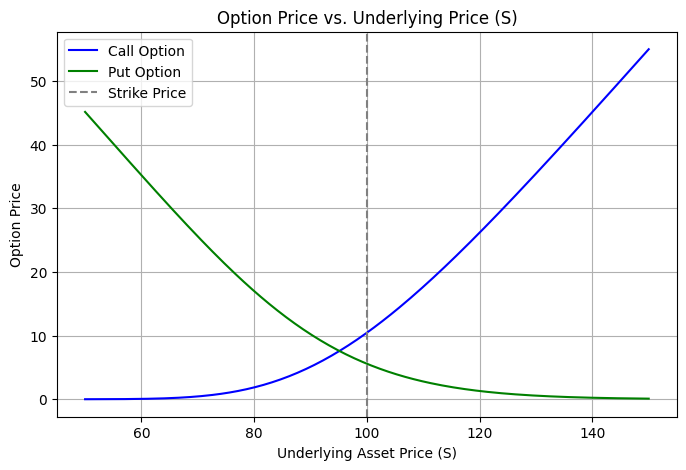

In [36]:
S_vals = np.linspace(50, 150, 200)
K = 100
T = 1
r = 0.05
sigma = 0.2

call_prices = [black_scholes_price(S, K, T, r, sigma, "call") for S in S_vals]
put_prices = [black_scholes_price(S, K, T, r, sigma, "put") for S in S_vals]

plt.figure(figsize=(8,5))
plt.plot(S_vals, call_prices, label="Call Option", color="blue")
plt.plot(S_vals, put_prices, label="Put Option", color="green")
plt.axvline(K, linestyle="--", color="gray", label="Strike Price")
plt.title("Option Price vs. Underlying Price (S)")
plt.xlabel("Underlying Asset Price (S)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

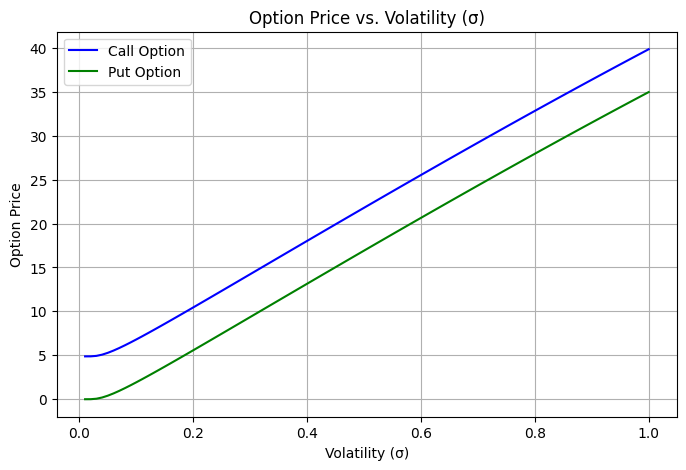

In [28]:
sigmas = np.linspace(0.01, 1, 100)
S = 100

call_prices = [black_scholes_price(S, K, T, r, sigma, "call") for sigma in sigmas]
put_prices = [black_scholes_price(S, K, T, r, sigma, "put") for sigma in sigmas]

plt.figure(figsize=(8,5))
plt.plot(sigmas, call_prices, label="Call Option", color="blue")
plt.plot(sigmas, put_prices, label="Put Option", color="green")
plt.title("Option Price vs. Volatility (σ)")
plt.xlabel("Volatility (σ)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()

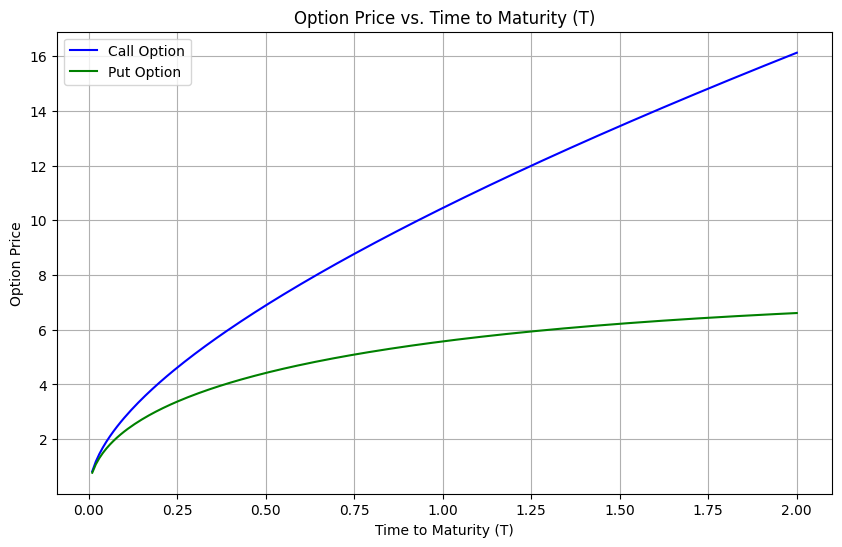

In [29]:
T_vals = np.linspace(0.01, 2, 200)

call_prices = [black_scholes_price(S, K, T, r, sigma, "call") for T in T_vals]
put_prices = [black_scholes_price(S, K, T, r, sigma, "put") for T in T_vals]

plt.figure(figsize=(10,6))
plt.plot(T_vals, call_prices, label="Call Option", color="blue")
plt.plot(T_vals, put_prices, label="Put Option", color="green")
plt.title("Option Price vs. Time to Maturity (T)")
plt.xlabel("Time to Maturity (T)")
plt.ylabel("Option Price")
plt.legend()
plt.grid(True)
plt.show()